<a href="https://colab.research.google.com/github/Sukantanath108/Data-Science-and-ML-journey/blob/main/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
from sklearn.datasets import fetch_openml
mnist_d = fetch_openml('mnist_784', as_frame=False)
# MINSt dataset ( 70000 handwritten digits )

In [ ]:
mnist_d.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [ ]:
mnist_d.data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
mnist_d.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
X , y = mnist_d.data , mnist_d.target
X.shape, y.shape

((70000, 784), (70000,))

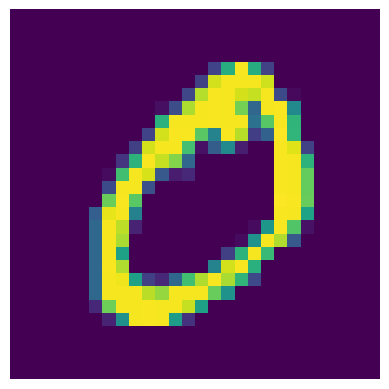

In [ ]:
def plot_digit(image_data):
  img = image_data.reshape(28,28)
  plt.imshow(img)
  # plt.imshow(img, cmap = "binary") here binary converts the picture to grayscale
  plt.axis("off")

digits = X[1]
plot_digit(digits)
plt.show()

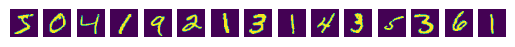

In [ ]:
for i in range(15):
  plt.subplot(1,15,i+1)
  plot_digit(X[i])
plt.show()

In [ ]:
# Mnist dataset is already pre-splited into 90-10 ratio
X_train , X_test , y_train , y_test = X[:60000], X[60000:] , y[:60000] , y[60000:]

In [ ]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [ ]:
# this dataset is already shuffled
# binary classifier training (7 & non-7) [Binary Classification problem]

y_train_7 = (y_train == '7')
y_test_7 = (y_test == '7')


In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_7)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([X[1]]) #2th element is actually 0(non-7). so its false

array([False])

In [ ]:
y_train_0 = (y_train == '0')
y_test_0 = (y_test == '0')


In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf_0 = SGDClassifier(random_state=42)
sgd_clf_0.fit(X_train, y_train_0)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf_0.predict([X[1]])

array([ True])

In [ ]:
#Fine-tuning

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_7, cv=3, scoring="accuracy") #cv =3 means three-fold

array([0.98105, 0.9735 , 0.95335])

In [ ]:
cross_val_score(sgd_clf_0, X_train, y_train_0, cv=4, scoring="accuracy")

array([0.98733333, 0.98746667, 0.9822    , 0.98133333])

In [ ]:
#import dummy classifier to check the authenticity of accuracy
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_7)
print(any(dummy_clf.predict(X_train)))
print(cross_val_score(dummy_clf, X_train, y_train_7, cv=3, scoring="accuracy"))


False
[0.8956  0.8956  0.89555]


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=False) #as shuffle is False, setting a random_state=42 isnt necessary

for train_index , test_index in skfolds.split( X_train , y_train_7 ):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_7[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_7[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_prediction = clone_clf.predict(X_test_fold)
  n_correct = sum(y_prediction == y_test_fold)
  print(n_correct / len(y_prediction))

0.98105
0.9735
0.95335


In [ ]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(sgd_clf , X_train , y_train_7 , cv=4)

In [ ]:
# we made predictions to use that for a confusion matrix. We didnt use our test set yet.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_7, y_pred)
cm

array([[52752,   983],
       [  587,  5678]])

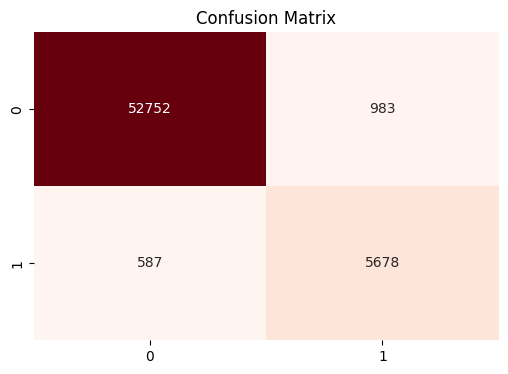

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False) #fmt shows value in decimel , cbar(true) shows a right side Y-axis bar
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# 11 is true negs(tn)
# 12 is false posi(fp)
# 21 is false neg(fn)
# 22 is true +(tp)

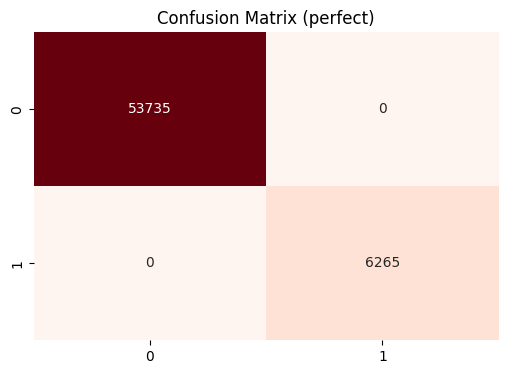

In [ ]:
y_train_perfect_values = y_train_7 #pretending to have perfect score
cm1 = confusion_matrix(y_train_7, y_train_perfect_values)
plt.figure(figsize=(6,4))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title("Confusion Matrix (perfect)")
plt.show()



In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score
# precision = (tp)/(tp+fp)
# recall = tp/(tp+fn)
p_score = precision_score(y_train_7 , y_pred)
r_score = recall_score(y_train_7 , y_pred)
f1_score = f1_score(y_train_7 , y_pred)
print(p_score, r_score, f1_score)
# y_pred = cross_val_predict(sgd_clf , X_train , y_train_7 , cv=4)


0.8524245608767452 0.9063048683160415 0.8785393779978338


In [ ]:
y_scores = sgd_clf.decision_function([digits])
y_scores

array([-20583.70405651])

In [ ]:
threshold = 0
y_digits_pred = (y_scores > threshold)
y_digits_pred

array([False])

In [ ]:
threshold = 3000
y_digits_pred = (y_scores > threshold)
y_digits_pred

array([False])

In [ ]:
#SGD uses threshold , so increasing thresshold may reduce recall score proving the trade-off theory

In [ ]:
y_scores = cross_val_predict(sgd_clf , X_train , y_train_7 , cv=3 , method='decision_function')

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_7, y_scores)

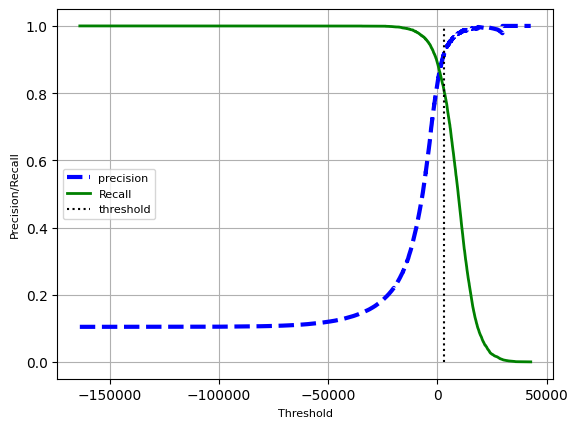

In [ ]:
plt.plot(thresholds, precisions[:-1] , "b--" , label = "precision" , linewidth=3)
plt.plot(thresholds, recalls[:-1] , "g-" , label = "Recall" , linewidth=2)
plt.vlines(threshold, 0 , 1 , "k" , "dotted", label="threshold")
plt.legend(loc="center left", fontsize=8)
plt.xlabel("Threshold", fontsize=8)
plt.ylabel("Precision/Recall", fontsize=8)
plt.grid(True)
plt.show()

In [ ]:
idx_for90_predictions = (precisions > 0.90).argmax()
threshold_for90_predcitions = thresholds[idx_for90_predictions]
threshold_for90_predcitions

2288.724768166237

In [ ]:
y_train_pred90 = (y_scores >= threshold_for90_predcitions)
precision_score(y_train_7, y_train_pred90)


0.9000864304235091

In [ ]:
recall_90pred  = recall_score(y_train_7, y_train_pred90)
recall_90pred

0.8311252992817239

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr , thresholds = roc_curve(y_train_7, y_scores)

In [ ]:
idx_for_threshold90 = (thresholds <= threshold_for90_predcitions ).argmax()
fpr_90, tpr_90 = fpr[idx_for_threshold90] , tpr[idx_for_threshold90]

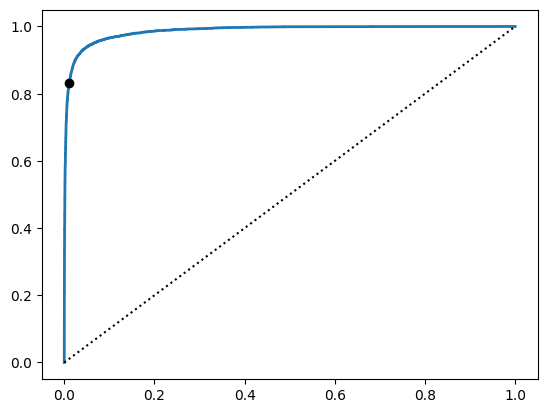

In [ ]:
plt.plot(fpr , tpr , linewidth=2 , label="ROC curve")
plt.plot([0,1] , [0,1], 'k:' , label="Random Classifier's ROC curve")
plt.plot([fpr_90] , [tpr_90] , "ko" , label="Threshold for 90% precision")

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_7, y_scores)

0.986670497551944